In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [57]:
dt = pd.read_csv("Position_Salaries.csv")

X = dt.iloc[:,1:-1].values
y = dt.iloc[:,-1].values

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=2)

In [59]:
# Converting y to 2D array
y = y.reshape(len(y),1)
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [60]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y =StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)
# X_test[:,3:] = sc.transform[X_test[:,3:]]

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [61]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/home/rohan/miniconda3/envs/dev/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [62]:
# predicting new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6]])).reshape(-1,1))

array([[145503.10688572]])

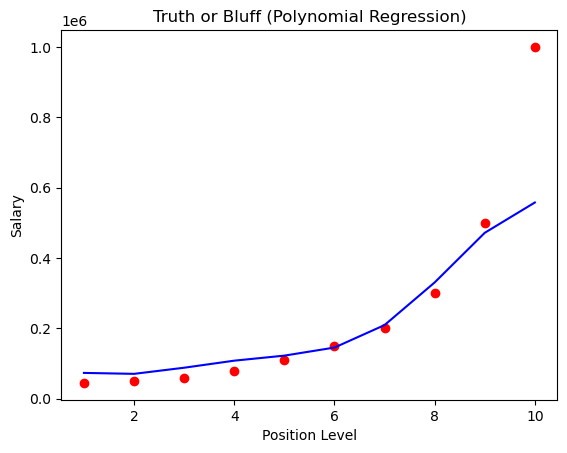

In [63]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [64]:
# X_grid = np.arrange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)), 0.1)
# X_grid = X_grid.reshape((len(X_grid),1))
# plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
# plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(X_grid).reshape(-1,1)),color='blue')
# plt.title('Truth or Bluff (SVR)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()